# 2. Explainability of Random Forests

In [34]:
# Load the required packages

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from utils import *  # Plots for the FI


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Will delete that afterwards...
%load_ext autoreload
%autoreload 2
import fgclustering
from fgclustering import FgClustering
fgclustering.__file__

'/Users/helena.pelin/Desktop/Workmap/Projects/FGC/Code/fg-clustering/fgclustering/__init__.py'

We will load the dataset we were using for training (processed version) and the trained random forest model from the previous notebook:

In [3]:
# Load the data
data_penguins = pd.read_csv('./data/data_penguins_processed.csv', index_col=0)

# Separate the target and feature columns
X_penguins = data_penguins.loc[:, data_penguins.columns != 'species']
y_penguins = data_penguins.species

# Load the model
rf = joblib.load(open('./models/random_forest_penguins.joblib', 'rb'))

In [4]:
data_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


Remember, we were transforming our target variable into integeres with the LabelEncoder instance. The resulting mapping from that process looks like this:

- Adelie = 0
- Chinstrap = 1
- Gentoo = 2

<center><img src="./data/penguins.png" width='300'> </center>

## Feature importance

### Permutation feature importance

In the previous courses you were introduced to the Permutation feature importance. Now it is the time to see how it works on the real dataset. 

<font color=red> @Lisa, please add info if needed, you know better to what they will be introduced before and if anything else should come here

In [ ]:
result = permutation_importance(rf, X_penguins, y_penguins, n_repeats=10, max_samples = 0.8, 
                                random_state=42)

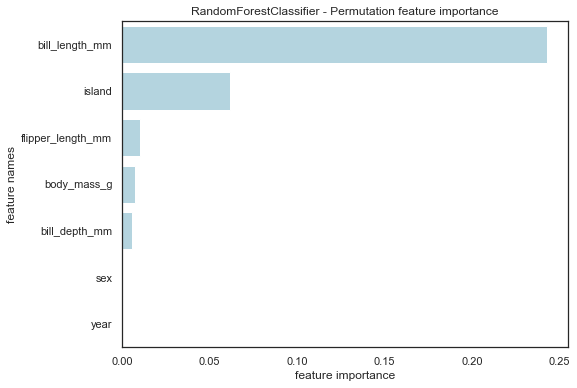

In [ ]:
plot_feature_importance(importance=result.importances_mean, names=X_penguins.columns, title="RandomForestClassifier - Permutation feature importance")

### Random Forest feature importance (impurity-based)


Feature importances are provided by the fitted attribute _feature_importances__ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

Lets plot the feature importance based on impurity:

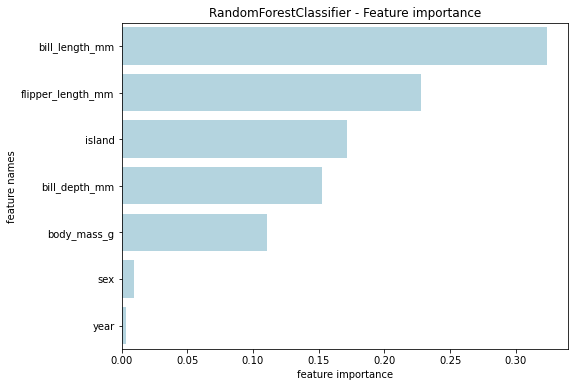

In [12]:
plot_feature_importance(rf.feature_importances_, names=X_penguins.columns, title="RandomForestClassifier - Feature importance")

### TASK 2.1
_____________
- Inspect the differences between the results of the two feature importance plots. What do you notice? 

    _Hint:_ Take a look at the correlation plot below
- Can we do better? Does any of these plots tells us more about the class-specific differences?


Your answer here:

...

_____________

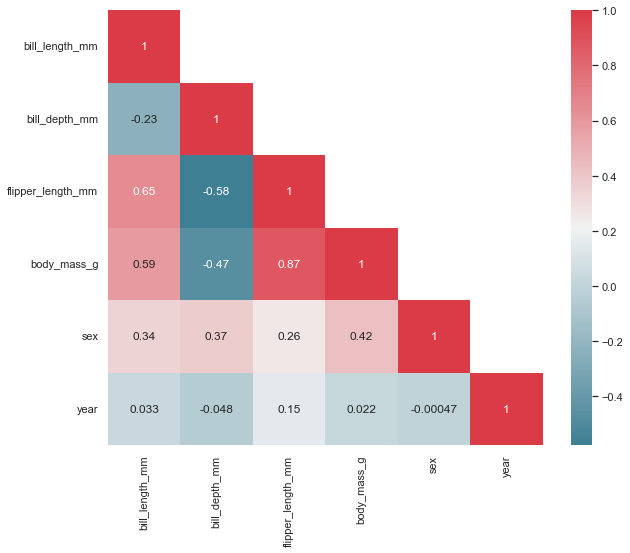

In [35]:
plot_correlation_matrix(X_penguins)

## Forest-Guided Clustering

**VIDEO (presentation with voice over)**

- algorithm overview on FGC -> figure

Documentation for the FGC: https://forest-guided-clustering.readthedocs.io/en/latest/

### FGC Example - explainability for Random Forest models

We will use FGC to gain more insights into decision paths of the random forest model we trained in the previous notebook. Afterwards, we will compare the results of the feature importance obtained by the previous methods and with FGC.

In [24]:
#  create an FGC instance
fgc = FgClustering(model=rf, data=X_penguins, target_column=y_penguins)

Interpreting RandomForestClassifier


In [36]:
# Run the fgc instance:
fgc.run(number_of_clusters=3)

Use 3 as number of cluster


FGC provides couple of ways to visualise the results and help interpret them:

- reveal the decision rules of RF model by visualizing feature patterns per cluster
- visualise global and local feature importance - features that show different and concise value distributions across clusters are defined to be globally or locally important


We start by revealing the decision rules of Random Forest. Here, we have two types of plots generated:

- The heatmap provides a general overview on the target value attribution and feature enrichment / depletion per cluster.  

- The distribution plots contain the same information as the heatmap just presented in a different way. Here the features are not standardized and we can see the actual scale of each feature on the y axis. Furthermore, we get an idea of the distribution of feature values within each cluster, e.g. having a small or high within-cluster-variation. 

We can choose which features we want to plot by specifying the _p_-value threshold applied to the _p_-values of the features from the global feature importance calculation. As you can see in the subtitle of the plots generated by running the cell below, the default threshold _thr_pvalue_ is set to 0.01.

What happens if we increase the _thr_pvalue_ to 1? Try it out! 

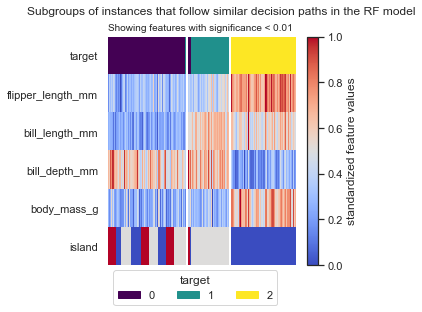

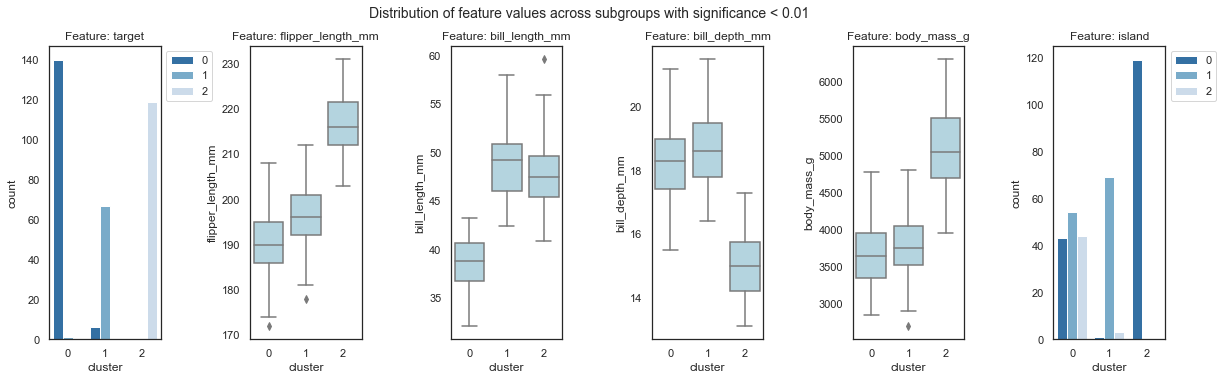

In [37]:
# Plot heatmap
fgc.plot_decision_paths() # add the thr_pvalue argument if you want to play around

### TASK 2.1
_______________________

By examining the plots created above, try to answer the following questions:

<font color=darkgreen>

- Which features are different per cluster? Which are not?
- Try to describe species by observing the plots (Adelie = 0, Chinstrap = 1, Gentoo = 2). Use the following examples to guide you: 
    - What makes Gentoo different from the other two species? 
    - What makes Chinstrap different from Adelie?
    - ...

<img src='./data/bill_length.png' width='200'>

</font>



Your answer here:

...


_______________________

### Feature importance from FGC - local and global

**Global feature importance** is represetned as the significance of the difference between cluster-wise feature distributions as a measure of global feature importance (ANOVA for continuous features and chi square for categorical features). **Features, which have significantly different distributions across clusters, have a high feature importance**, while features, which have a similar feature distribution across clusters have a low feature importance.

In addition to the global feature importance, we also provide a **local feature importance**, which gives the **importance of each feature for each cluster**. For the local feature importance we pre-filter the features based on the global feature importance (_thr_pvalue_ is used for the filtering step, just as in the plots before). Here, a feature is considered important if its distribution in a particlular cluster is clearly different from the feature distribution in the whole dataset.

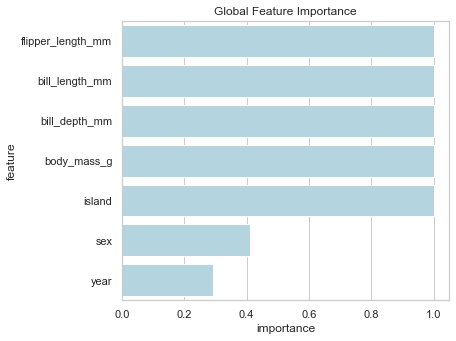

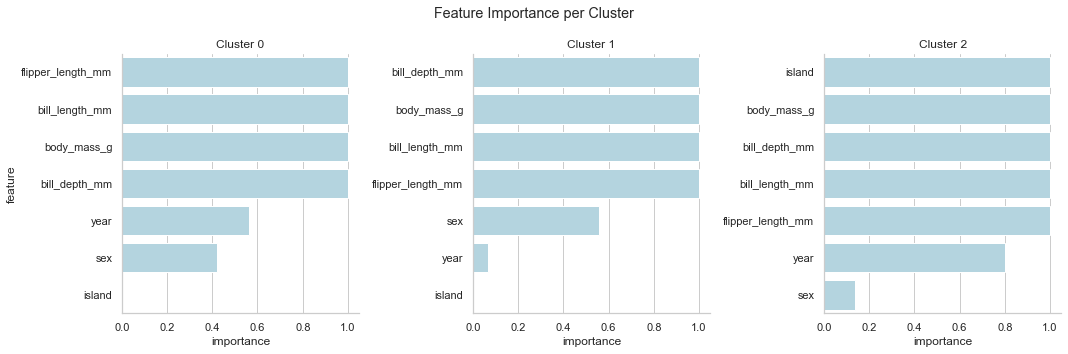

In [27]:
%matplotlib inline
# Plot global feature importance
fgc.plot_global_feature_importance()
# Plot local feature importance
fgc.plot_local_feature_importance(thr_pvalue=1) # We want to see all the features


### TASK 2.2
_____________

QUESTIONS 
- Which differences do you observe compared to the Permutation and impurity-based feature importance? Do you know more?


Your answer here:

...


_______________________